In [433]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# show all columns 
pd.set_option('display.max_columns', None)
# show entire rows
pd.set_option('display.max_rows', None)
# show all values in a cell
pd.set_option('display.max_colwidth', None)

In [434]:
# import dataset
df = pd.read_excel('../Data/clean_data_sp_w_revenue_w_potential.xlsx')

In [435]:
df.head()

,nome,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial,popDe25a49,domiciliosA,domiciliosB,popAte14,domicilios,propDomiciliosCriancas,propDomiciliosIdosos,rendaTotal,rendaMediaPop,propDomiciliosA,propDomiciliosB,propDomiciliosC,propDomiciliosD,propDomiciliosE
0,A. E. Carvalho,94034,12668,6853,9836,7487,14535,21549,10598,10508,0,253,2197,4368,6681,7011,2247,5670,1501,4.970912e+05,Alto,36084,253,6565,19521,28427,0.686706,0.369649,42668927,453.760629,0.008900,0.230942,0.481655,0.079045,0.199458
1,Aclimação,32791,2297,1017,2096,2197,5341,7281,4917,7645,1413,1734,3704,2351,1946,827,291,1617,5920,1.332529e+06,Alto,12622,3147,6055,3314,13883,0.238709,0.550673,82187360,2506.399927,0.226680,0.436145,0.199741,0.020961,0.116473
2,Adventista,104193,15070,7343,10631,8657,17749,23364,11567,9812,0,0,1423,4875,8595,10082,3111,5776,1284,1.887401e+05,Médio,41113,0,6298,22413,33862,0.661892,0.289764,43478808,417.291066,0.000000,0.185990,0.551562,0.091873,0.170575
3,Água Branca,12721,953,343,627,819,2142,2833,1790,3214,624,667,1558,1032,915,361,84,404,6278,1.181028e+06,Alto,4975,1291,2590,1296,5645,0.229584,0.569353,35439310,2785.890260,0.228698,0.458813,0.226041,0.014880,0.071568
4,Água Funda,48417,5078,2396,4018,3571,7388,10751,6648,8567,0,303,1794,2986,4489,2836,1104,2553,1905,7.844942e+05,Alto,18139,303,4780,7474,16065,0.465235,0.533271,30603825,632.088419,0.018861,0.297541,0.455960,0.068721,0.158917


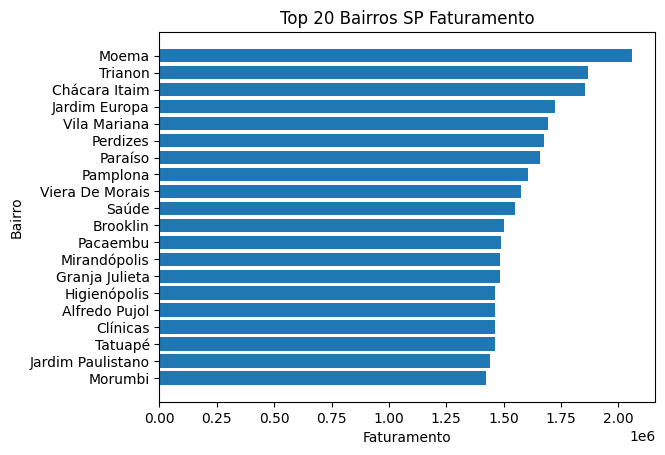

In [436]:
# Calcule o faturamento total por nome
total_faturamento = df.groupby("nome")["faturamento"].sum()

# Selecione apenas os top 10 nomes em termos de faturamento total
top_20 = total_faturamento.nlargest(20)

# Crie um gráfico de barras com o faturamento no eixo X e o nome no eixo Y
ax = plt.barh(top_20.index, top_20)
plt.xlabel("Faturamento")
plt.ylabel("Bairro")

# Inverta a ordem do eixo Y para que o nome com o maior faturamento fique no topo
plt.gca().invert_yaxis()

plt.title("Top 20 Bairros SP Faturamento")

plt.show()

In [437]:
# crie uma faixa com 5 valores de renda
df['faixa_renda'] = pd.qcut(df['rendaMedia'], 5)
# substitui os valores por A, B, C, D e E
df['faixa_renda'] = df['faixa_renda'].cat.rename_categories(['E', 'D', 'C', 'B', 'A'])
df['faixa_etaria_alvo'] = pd.qcut(df['popDe25a49'], 5)
# substitui os valores por top, superior, medio, inferior e bottom
df['faixa_etaria_alvo'] = df['faixa_etaria_alvo'].cat.rename_categories(['bottom', 'inferior', 'medio', 'superior', 'top'])
df['faixa_domiciliosA'] = pd.qcut(df['domiciliosA'], 5)
# substitui os valores por top, superior, medio, inferior e bottom
df['faixa_domiciliosA'] = df['faixa_domiciliosA'].cat.rename_categories(['bottom', 'inferior', 'medio', 'superior', 'top'])
df['faixa_domiciliosB'] = pd.qcut(df['domiciliosB'], 5)
# substitui os valores por top, superior, medio, inferior e bottom
df['faixa_domiciliosB'] = df['faixa_domiciliosB'].cat.rename_categories(['bottom', 'inferior', 'medio', 'superior', 'top'])

agrupamento = df.groupby(['faixa_renda','faixa_etaria_alvo','faixa_domiciliosA','faixa_domiciliosB','potencial']).median()
# faixa de renda A = '(6577.6, 21677.0]' e B = '(3254.4, 6577.6]'
# rendaMedia entre 3254.4 e 21677.0
agrupamento = agrupamento[agrupamento['rendaMedia'] >= 3254.4]
agrupamento

/tmp/ipykernel_9959/3746069735.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agrupamento = df.groupby(['faixa_renda','faixa_etaria_alvo','faixa_domiciliosA','faixa_domiciliosB','potencial']).median()


população  \
faixa_renda faixa_etaria_alvo faixa_domiciliosA faixa_domiciliosB potencial              
B           bottom            inferior          bottom            Baixo         1516.0   
                                                                  Médio         3409.0   
                              medio             bottom            Médio         7786.0   
                                                inferior          Médio         8991.0   
            inferior          medio             inferior          Médio        16210.0   
                                                medio             Alto         14861.0   
                              superior          bottom            Médio        18631.0   
                                                inferior          Alto         19138.5   
                                                medio             Alto         20918.0   
                              top               medio             Alto         23065.0   
            medio             superior          medio             Alto         26995.5   
                                                superior          Alto         34925.0   
                                                top               Alto         40368.0   
                              top               superior          Alto         33559.5   
                                                top               Alto         35716.0   
            superior          superior          top               Alto         44677.0   
                              top               superior          Alto         47028.0   
                                                top               Alto         44902.0   
            top               top               top               Alto         64419.0   
A           bottom            medio             bottom            Médio         4572.0   
                              superior          bottom            Médio         8499.0   
                                                inferior          Alto         12382.0   
                                                                  Médio        10218.0   
                              top               bottom            Médio        11053.5   
                                                inferior          Médio        14523.0   
            inferior          superior          inferior          Alto         14731.5   
                                                                  Médio        14218.0   
                                                medio             Alto         20179.0   
                              top               bottom            Alto         22088.0   
                                                inferior          Alto         17418.5   
                                                                  Médio        12913.0   
                                                medio             Alto         20765.0   
                                                superior          Alto         25642.0   
            medio             superior          medio             Alto         30301.0   
                              top               medio             Alto         35403.0   
                                                superior          Alto         28697.0   
                                                top               Alto         38935.0   
            superior          top               medio             Alto         47060.0   
                                                top               Alto         49429.0   
            top               top               top               Alto         60709.0   

                                                                             popAte9  \
faixa_renda faixa_etaria_alvo faixa_domiciliosA faixa_domiciliosB potencial            
B           bottom            inferior          bottom            Baixo        201.0   
                                

In [438]:
df.groupby(['faixa_renda','faixa_etaria_alvo','faixa_domiciliosA','faixa_domiciliosB'])['nome'].describe()

count  \
faixa_renda faixa_etaria_alvo faixa_domiciliosA faixa_domiciliosB         
E           bottom            bottom            bottom                6   
                              inferior          bottom                2   
            inferior          bottom            bottom                1   
            medio             bottom            bottom                4   
                                                inferior              2   
                              inferior          bottom                1   
            superior          bottom            inferior              4   
                                                medio                 1   
                              inferior          bottom                1   
                                                inferior              1   
            top               bottom            inferior              4   
                                                medio                11   
                                                superior              8   
                                                top                   4   
                              inferior          medio                 1   
                                                superior              4   
                                                top                   4   
D           bottom            bottom            bottom                1   
                              inferior          bottom                9   
            inferior          bottom            bottom                1   
                                                inferior              2   
                              inferior          bottom                1   
                                                inferior              2   
            medio             bottom            inferior              2   
                                                medio                 1   
                              inferior          inferior              3   
                                                medio                 2   
                              medio             medio                 1   
            superior          bottom            superior              1   
                                                top                   1   
                              inferior          medio                 8   
                                                superior              2   
                              medio             medio                 2   
                                                superior              5   
                                                top                   1   
            top               bottom            superior              1   
                                                top                   3   
                              inferior          superior              1   
                                                top                   1   
                              medio             superior              1   
                                                top                   5   
                              superior          top                   1   
C           bottom            bottom            bottom                1   
                              inferior          bottom                7   
                                                inferior              1   
                              medio             inferior              1   
            inferior          inferior          inferior              2   
                              medio             inferior              5   
                                                medio                 2   
            medio             medio             inferior              2   
                                                medio                 4   
                                                superior              2   
                

In [439]:
df[df['rendaMedia'] >= 3254.4].groupby(['faixa_renda','faixa_etaria_alvo','faixa_domiciliosA','faixa_domiciliosB','potencial']).agg({'nome': ['count', lambda x: ', '.join(x)]}).dropna()

nome  \
                                                                            count   
faixa_renda faixa_etaria_alvo faixa_domiciliosA faixa_domiciliosB potencial         
B           bottom            inferior          bottom            Baixo         3   
                                                                  Médio         1   
                              medio             bottom            Médio         5   
                                                inferior          Médio         3   
            inferior          medio             inferior          Médio         2   
                                                medio             Alto          1   
                              superior          bottom            Médio         1   
                                                inferior          Alto          4   
                                                medio             Alto         11   
                              top               medio             Alto          1   
            medio             superior          medio             Alto          2   
                                                superior          Alto          4   
                                                top               Alto          1   
                              top               superior          Alto          8   
                                                top               Alto          2   
            superior          superior          top               Alto          3   
                              top               superior          Alto          1   
                                                top               Alto          4   
            top               top               top               Alto          1   
A           bottom            medio             bottom            Médio         4   
                              superior          bottom            Médio         5   
                                                inferior          Alto          1   
                                                                  Médio         4   
                              top               bottom            Médio         4   
                                                inferior          Médio         1   
            inferior          superior          inferior          Alto          2   
                                                                  Médio         1   
                                                medio             Alto          1   
                              top               bottom            Alto          1   
                                                inferior          Alto          8   
                                                                  Médio         1   
                                                medio             Alto          7   
                                                superior          Alto          1   
            medio             superior          medio             Alto          1   
                              top               medio             Alto          1   
                                                superior          Alto          9   
                                                top               Alto          3   
            superior          top               medio             Alto          1   
                                                top               Alto          2   
            top               top               top               Alto          1   

                                                                                                                                                                                                                                   
                                                                                                                                                                                                 

In [440]:
df[df['rendaMedia'] >= 3254.4].groupby(['faixa_renda','faixa_etaria_alvo','faixa_domiciliosA','faixa_domiciliosB','potencial']).agg({'nome': ['count', lambda x: ', '.join(x)], 'faturamento': 'median'}).dropna()


nome  \
                                                                            count   
faixa_renda faixa_etaria_alvo faixa_domiciliosA faixa_domiciliosB potencial         
B           bottom            inferior          bottom            Baixo         3   
                                                                  Médio         1   
                              medio             bottom            Médio         5   
                                                inferior          Médio         3   
            inferior          medio             inferior          Médio         2   
                                                medio             Alto          1   
                              superior          bottom            Médio         1   
                                                inferior          Alto          4   
                                                medio             Alto         11   
                              top               medio             Alto          1   
            medio             superior          medio             Alto          2   
                                                superior          Alto          4   
                                                top               Alto          1   
                              top               superior          Alto          8   
                                                top               Alto          2   
            superior          superior          top               Alto          3   
                              top               superior          Alto          1   
                                                top               Alto          4   
            top               top               top               Alto          1   
A           bottom            medio             bottom            Médio         4   
                              superior          bottom            Médio         5   
                                                inferior          Alto          1   
                                                                  Médio         4   
                              top               bottom            Médio         4   
                                                inferior          Médio         1   
            inferior          superior          inferior          Alto          2   
                                                                  Médio         1   
                                                medio             Alto          1   
                              top               bottom            Alto          1   
                                                inferior          Alto          8   
                                                                  Médio         1   
                                                medio             Alto          7   
                                                superior          Alto          1   
            medio             superior          medio             Alto          1   
                              top               medio             Alto          1   
                                                superior          Alto          9   
                                                top               Alto          3   
            superior          top               medio             Alto          1   
                                                top               Alto          2   
            top               top               top               Alto          1   

                                                                                                                                                                                                                                   \
                                                                                                                                                                                                

In [441]:
filtered_targets = df[(df['rendaMedia'] >= 3254.4) & (df['popDe25a49'] >= 15767.6)].groupby(['faixa_renda','faixa_etaria_alvo','faixa_domiciliosA','faixa_domiciliosB','potencial']).agg({'nome': ['count', lambda x: ', '.join(x)], 'faturamento': 'median'}).rename(columns={'<lambda_0>': '','nome': 'bairro'}).dropna()

In [442]:
filtered_targets

bairro  \
                                                                             count   
faixa_renda faixa_etaria_alvo faixa_domiciliosA faixa_domiciliosB potencial          
B           superior          superior          top               Alto           3   
                              top               superior          Alto           1   
                                                top               Alto           4   
            top               top               top               Alto           1   
A           superior          top               medio             Alto           1   
                                                top               Alto           2   
            top               top               top               Alto           1   

                                                                                                                                                  \
                                                                                                                                                   
faixa_renda faixa_etaria_alvo faixa_domiciliosA faixa_domiciliosB potencial                                                                        
B           superior          superior          top               Alto              Cidade Ademar, Santa Cecília/Campos Elísios, Vila Califórnia   
                              top               superior          Alto                                                           Jardim Adalgiza   
                                                top               Alto       Jardim Marajoara, Marechal Deodoro, Piqueri/Parque São Jorge, Saúde   
            top               top               top               Alto                                                       Vila Santa Catarina   
A           superior          top               medio             Alto                                                              Vila Andrade   
                                                top               Alto                                                         Perdizes, Tatuapé   
            top               top               top               Alto                                                                     Moema   

                                                                              faturamento  
                                                                                   median  
faixa_renda faixa_etaria_alvo faixa_domiciliosA faixa_domiciliosB potencial                
B           superior          superior          top               Alto       1.100509e+06  
                              top               superior          Alto       1.012754e+06  
                                                top               Alto       1.374343e+06  
            top               top               top               Alto       1.070651e+06  
A           superior          top               medio             Alto       1.344942e+06  
                                                top               Alto       1.568786e+06  
            top               top               top               Alto       2.058364e+06

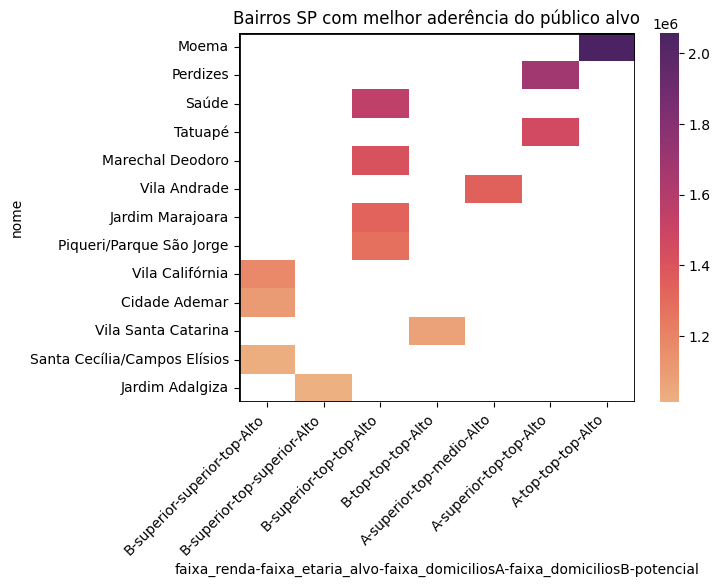

In [443]:
# Crie uma tabela dinâmica com o faturamento por nome e outras colunas
pivot = df[(df['rendaMedia'] >= 3254.4) & (df['popDe25a49'] >= 15767.6)].pivot_table(index="nome", columns=['faixa_renda','faixa_etaria_alvo','faixa_domiciliosA','faixa_domiciliosB','potencial'], values="faturamento")

# Calcule o faturamento total de cada nome
total_faturamento = pivot.sum(axis=1)

# Ordene as linhas da tabela dinâmica pelo faturamento total
pivot = pivot.loc[total_faturamento.sort_values(ascending=False).index]

# Crie um heatmap a partir da tabela dinâmica
ax = sns.heatmap(pivot, cmap="flare", annot=False, fmt=".2f")

# Rotacione os rótulos dos nomes no eixo X em 45 graus e ajuste sua posição horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Adicione delimitações nos eixos
ax.axhline(y=0, color="k", linewidth=2)
ax.axhline(y=pivot.shape[0], color="k", linewidth=2)
ax.axvline(x=0, color="k", linewidth=2)
ax.axvline(x=pivot.shape[1], color="k", linewidth=2)


plt.title("Bairros SP com melhor aderência do público alvo")

plt.show()

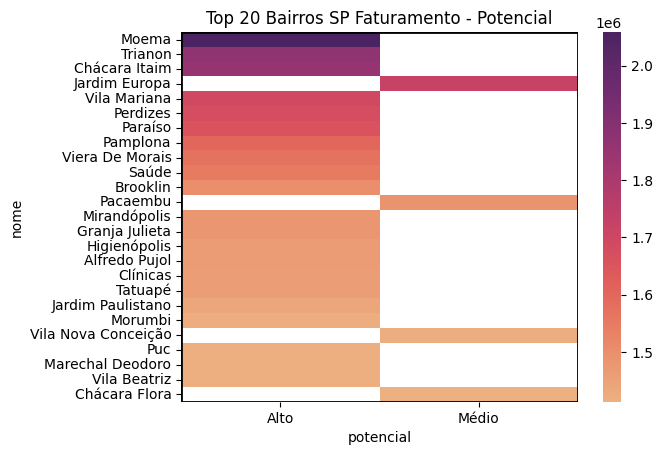

In [444]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecione apenas os top 30 nomes em termos de faturamento total
top_30 = df.groupby("nome")["faturamento"].sum().nlargest(25).index
df = df[df["nome"].isin(top_30)]

# Crie uma tabela dinâmica com o faturamento por nome e potencial
pivot = df.pivot_table(index="nome", columns="potencial", values="faturamento", aggfunc="sum")

# Ordene as linhas da tabela dinâmica pelo faturamento total
pivot = pivot.loc[top_30]

# Crie um heatmap a partir da tabela dinâmica
ax = sns.heatmap(pivot, cmap="flare", fmt=".2f")

# Adicione delimitações nos eixos
ax.axhline(y=0, color="k", linewidth=2)
ax.axhline(y=pivot.shape[0], color="k", linewidth=2)
ax.axvline(x=0, color="k", linewidth=2)
ax.axvline(x=pivot.shape[1], color="k", linewidth=2)

plt.title("Top 20 Bairros SP Faturamento - Potencial")

plt.show()

In [445]:
df[(df['rendaMedia'] >= 3254.4) & (df['popDe25a49'] >= 15767.6)].pivot_table(index="nome", columns=['potencial','faixa_etaria_alvo','faixa_domiciliosA','faixa_domiciliosB'], values="faturamento")

potencial                  Alto              
faixa_etaria_alvo      superior           top
faixa_domiciliosA           top           top
faixa_domiciliosB           top           top
nome                                         
Marechal Deodoro   1.415671e+06           NaN
Moema                       NaN  2.058364e+06
Perdizes           1.676565e+06           NaN
Saúde              1.550421e+06           NaN
Tatuapé            1.461007e+06           NaN